# Connecting to Samarjit's dj db

In [1]:
import datajoint as dj
import sys
sys.path.append('/Users/riekelabbackup/Desktop/Vyom/gitrepos/samarjit_datajoint/next-app/api/')
import schema

[2024-10-10 14:51:45,737][INFO]: Connecting root@127.0.0.1:3306
[2024-10-10 14:51:45,908][INFO]: Connected root@127.0.0.1:3306


In [2]:
host_address, user, password = '127.0.0.1', 'root', 'simple'
dj.config["database.host"] = f"{host_address}"
dj.config["database.user"] = f"{user}"
dj.config["database.password"] = f"{password}"
dj.conn()

DataJoint connection (connected) root@127.0.0.1:3306

In [3]:
df_meta = (schema.EpochBlock() & 'protocol_id=25').fetch(format='frame')

In [4]:
df_meta = df_meta.reset_index()
df_meta

,id,h5_uuid,data_dir,experiment_id,parent_id,protocol_id,chunk_id,label,properties,attributes,start_time,end_time,parameters,array_pitch
0,131,45a11efe-f80c-4b87-9c1a-2fad88dd7a14,,3,40,25,None,None,"{'ndf': 0, 'maxRod': 0.311382421517448, 'maxLC...",{'uuid': '45a11efe-f80c-4b87-9c1a-2fad88dd7a14...,2023-06-13 14:23:21,2023-06-13 14:23:49,"{'amp': 'Amp1', 'preTime': 250, 'stimTime': 60...",None
1,132,8e1bc9d2-e599-4d8d-8282-3144a180a5ac,,3,40,25,None,None,"{'ndf': 0, 'maxRod': 0.311382421517448, 'maxLC...",{'uuid': '8e1bc9d2-e599-4d8d-8282-3144a180a5ac...,2023-06-13 14:24:00,2023-06-13 14:31:49,"{'amp': 'Amp1', 'preTime': 250, 'stimTime': 60...",None
2,159,bf68ad7e-2de4-4b35-8084-a5a5f319f699,,4,42,25,None,None,"{'ndf': 0, 'maxRod': 0.311382421517448, 'maxLC...",{'uuid': 'bf68ad7e-2de4-4b35-8084-a5a5f319f699...,2023-11-29 14:12:46,2023-11-29 14:19:11,"{'amp': 'Amp1', 'preTime': 250, 'stimTime': 60...",None
3,194,72cc8185-7972-40c0-a26e-b6097bd98a06,20240813C/data004/,5,49,25,3,None,"{'ndf': 'null', 'maxRod': 151994.22959023068, ...",{'uuid': '72cc8185-7972-40c0-a26e-b6097bd98a06...,2024-08-13 15:53:44,2024-08-13 16:19:21,"{'amp': 'Amp1', 'preTime': 250, 'stimTime': 60...",60um


In [19]:
schema.Experiment() & 'id=3'

id,h5_uuid,meta_file,"data_file empty if MEA for now, maybe should store ""/Volumes/data/data/sorted"" here?",tags_file,"is_mea 1 if MEA, 0 if not",date_added,label,properties,attributes,start_time,experimenter,institution,lab,project,rig,rig_type
3,cb3c8191-cbcd-491a-bf8d-16a6c317446e,/Volumes/data-1/datajoint_testbed/meta/20230613B.json,/Volumes/data-1/datajoint_testbed/data/20230613B.h5,/Volumes/data-1/datajoint_testbed/tags/20230613B.json,0,2024-10-07 11:37:21,Primate,=BLOB=,=BLOB=,2023-06-13 08:46:09,None,None,None,None,None,PATCH


In [27]:
df_meta.loc[0,'properties'], df_meta.loc[0,'parameters']

({'ndf': 0,
  'maxRod': 0.311382421517448,
  'maxLCone': 0.41977380315461704,
  'maxMCone': 0.39094509424685103,
  'maxSCone': 0.07445686809475699,
  'stageClass': 'Video',
  'objectiveMag': 'null',
  'micronsPerPixel': 0.8},
 {'amp': 'Amp1',
  'preTime': 250,
  'stimTime': 6000,
  'tailTime': 500,
  'waitTime': 1000,
  'freezeFEMs': 0,
  'sampleRate': 10000,
  'maskDiameter': 0,
  'onlineAnalysis': 'extracellular',
  'stimulusIndices': [2, 6, 12, 24, 50],
  'apertureDiameter': 2000,
  'numberOfAverages': 48,
  'interpulseInterval': 0.5})

In [10]:
df_e = (schema.Epoch() & 'parent_id=131').fetch(format='frame')
df_e = df_e.reset_index()
df_e.head()
# df_e.loc[0,'parameters']

,id,h5_uuid,experiment_id,parent_id,label,properties,attributes,start_time,end_time,parameters
0,2376,6da6f605-b776-4a80-af37-fd3e00fad483,3,131,None,{'bathTemperature': 32.2},{'uuid': '6da6f605-b776-4a80-af37-fd3e00fad483...,2023-06-13 14:23:23,2023-06-13 14:23:30,"{'NDF': 0, 'amp': 'Amp1', 'gain': 'medium', 'n..."
1,2377,e0cc52b3-7a86-43e3-b506-e904bd7c5af1,3,131,None,{'bathTemperature': 32.1},{'uuid': 'e0cc52b3-7a86-43e3-b506-e904bd7c5af1...,2023-06-13 14:23:34,2023-06-13 14:23:41,"{'NDF': 0, 'amp': 'Amp1', 'gain': 'medium', 'n..."


In [30]:
df_e.loc[0,'parameters']

{'NDF': 0,
 'amp': 'Amp1',
 'gain': 'medium',
 'ndfs': '[]',
 'preTime': 250,
 'stimTime': 6000,
 'tailTime': 500,
 'waitTime': 1000,
 'frameRate': 60,
 'imageName': 'imk00031.iml',
 'lightPath': 'above',
 'prerender': 0,
 'canvasSize': [800, 600],
 'freezeFEMs': 0,
 'sampleRate': 10000,
 'subjectName': 'ACB2.eye',
 'centerOffset': [-45, -17],
 'maskDiameter': 0,
 'stimulusIndex': 2,
 'currentStimSet': 'dovesFEMstims20160826.mat',
 'onlineAnalysis': 'extracellular',
 'trueCanvasSize': [1600, 600],
 'micronsPerPixel': 1,
 'stimulusIndices': [2, 6, 12, 24, 50],
 'apertureDiameter': 2000,
 'numberOfAverages': 48,
 'interpulseInterval': 0.5,
 'monitorRefreshRate': 60,
 'backgroundIntensity': 0.35362239121035516,
 'magnificationFactor': 3,
 'microdisplayBrightness': 'high',
 'microdisplayBrightnessValue': 25}

In [31]:
df_r = (schema.Response() & 'parent_id=2376').fetch(format='frame')
df_r = df_r.reset_index()
df_r

,id,h5_uuid,parent_id,device_name,h5path,label,sample_rate,sample_rate_units,offset_hours,offset_ticks
0,4537,3330f470-dbeb-4efc-bd95-f9081bc38e9a,2376,Amp1,/experiment-08e222e4-3c85-4416-a50e-831dd7b78a...,None,10000,Hz,-7,638222630037485908
1,4538,5fc3ca48-e88e-442d-82e7-ddb21fa5528b,2376,Frame Monitor,/experiment-08e222e4-3c85-4416-a50e-831dd7b78a...,None,10000,Hz,-7,638222630037495908


In [32]:
import h5py
str_h5 = '/Volumes/data-1/datajoint_testbed/data/20230613B.h5'
str_h5path = df_r.loc[0,'h5path']
str_frames = df_r.loc[1,'h5path']
with h5py.File(str_h5, 'r') as f:
    data = f[str_h5path]['data']['quantity']
    frames = f[str_frames]['data']['quantity']

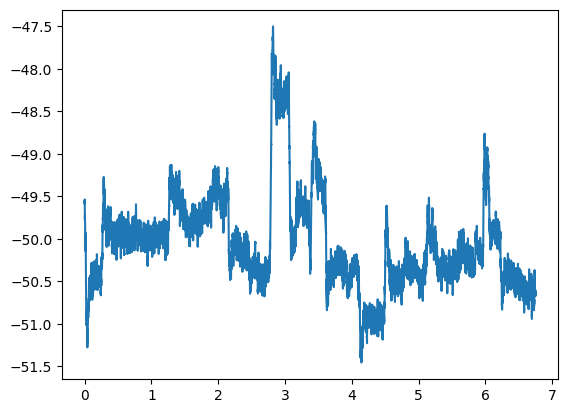

In [33]:
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots()
n_pts = len(data)
n_sample_rate = 10000 # Hz
t_pts = np.arange(n_pts)/n_sample_rate
ax.plot(t_pts, data)

(0.0, 0.5)

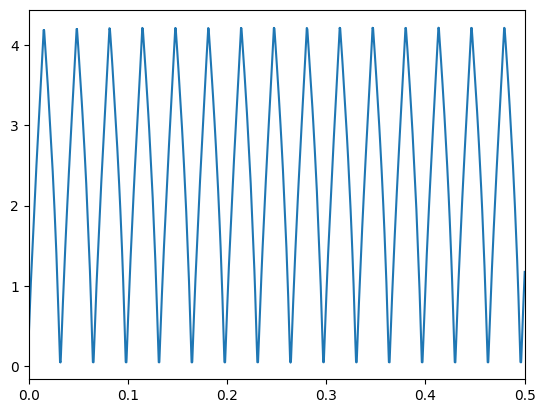

In [35]:
# Plot frames
f, ax = plt.subplots()
n_pts = len(frames)
n_sample_rate = 10000 # Hz
t_pts = np.arange(n_pts)/n_sample_rate
ax.plot(t_pts, frames)
ax.set_xlim(0,0.5)

In [36]:
frames

array([0.32     , 0.3528125, 0.3865625, ..., 0.045    , 0.045    ,
       0.0453125])